In [173]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [174]:
dt=pd.read_csv("C:/Users/Nandhini Sivakumar/Downloads/SD03Q014/reported_numbers.csv")
dt.rename(columns={'No. of cases':'No.of_cases','No. of deaths':'No.of_deaths','WHO Region':'WHO_Region'},inplace=True)

In [175]:
dt['No.of_deaths'].fillna(value=dt['No.of_deaths'].mean(), inplace=True)
dt['No.of_cases'].fillna(value=dt['No.of_cases'].mean(), inplace=True)
dt.head(5)

,Country,Year,No.of_cases,No.of_deaths,WHO_Region
0,Afghanistan,2017,161778.0,10.000000,Eastern Mediterranean
1,Algeria,2017,0.0,0.000000,Africa
2,Angola,2017,3874892.0,13967.000000,Africa
3,Argentina,2017,0.0,1.000000,Americas
4,Armenia,2017,0.0,1289.413731,Europe


In [176]:
dtgroup=dt.groupby('Country')["No.of_cases","No.of_deaths"].sum().reset_index()
dtgroup.head()
dtcase = dtgroup[["Country","No.of_cases"]]
dtcase.head()

,Country,No.of_cases
0,Afghanistan,2.295043e+06
1,Algeria,2.645000e+03
2,Angola,2.795480e+07
3,Argentina,2.098000e+03
4,Armenia,3.550000e+02


In [177]:
pio.templates.default ='plotly_dark'
fig = px.bar(dtcase.sort_values("No.of_cases",ascending=False)[:20][::-1],x="No.of_cases",y ="Country",text="No.of_cases",
             title="Top 20 Countries with highest number of Malaria Cases from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=500,orientation="h")
fig.show()

In [178]:
dtdeath = dtgroup[["Country","No.of_deaths"]]
pio.templates.default ='plotly_dark'
fig = px.bar(dtdeath.sort_values("No.of_deaths",ascending=False)[:20][::-1],x="No.of_deaths",y ="Country",text="No.of_deaths",
             title="Top 20 Countries with highest number of Malaria Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Light24,height=500,orientation="h")
fig.show()

In [179]:
who_group =dt.groupby('WHO_Region')["No.of_cases","No.of_deaths"].sum().reset_index()
who_group.head().style.background_gradient(cmap ='Reds')
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No.of_cases",ascending=False)[::-1],y="No.of_cases",x ="WHO_Region",text="No.of_cases",
             title="WHO regions with highest number of Cases from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [180]:
pio.templates.default = "plotly_dark"
fig = px.bar(who_group.sort_values("No.of_deaths",ascending=False)[::-1],y="No.of_deaths",x ="WHO_Region",text="No.of_deaths",
             title="WHO regions with highest number of Deaths from 2000 to 2018",
             color_discrete_sequence= px.colors.qualitative.Set1,height=500,orientation="v")
fig.show()

In [181]:
yrgroup= dt.groupby("Year")[["No.of_cases","No.of_deaths"]].sum().reset_index()
yrgroup.head()

,Year,No.of_cases,No.of_deaths
0,2000,2.067793e+07,144954.204179
1,2001,1.793890e+07,147426.170746
2,2002,1.732549e+07,154150.170746
3,2003,1.930675e+07,196391.170746
4,2004,1.772943e+07,151676.515821


Text(0.5, 1.0, 'In other WHO Regions')

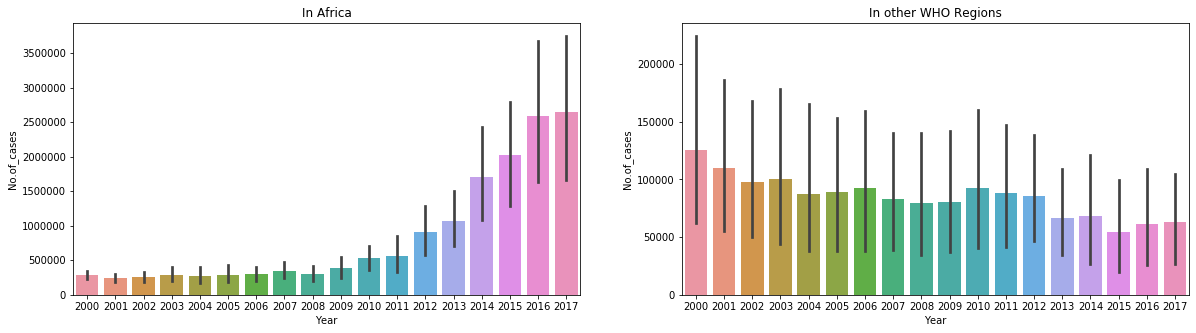

In [182]:
fig_dims = (20, 5)
fig, axes = plt.subplots(1, 2, figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No.of_cases' , data = dt[dt['WHO_Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No.of_cases' , data = dt[dt['WHO_Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

In [183]:
fig = make_subplots(rows=1,cols=2,column_titles = ('No. of cases','No. of deaths'))
trace_1 = go.Scatter(x=yrgroup['Year'],y=yrgroup['No.of_cases'],name='Cases',opacity=0.9,mode='lines+markers',line_color='pink')
trace_2 = go.Scatter(x=yrgroup['Year'],y=yrgroup['No.of_deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='violet')
fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)
fig.update_layout(title_text="Spread of Malaria according to Year")
fig.show()

In [184]:
fig = px.choropleth(dtgroup,locationmode="country names",locations ="Country",hover_data = ["Country","No.of_cases","No.of_deaths"],
                    hover_name = "Country",color="Country",title="Situation of Malaria Over the World")
fig.show()